In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, interpolate

In [3]:
df = pd.read_csv('Cleaned.csv')
df.head()

,name,market_cap,sales_qtr
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51


In [4]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        459 non-null    object 
 1   market_cap  459 non-null    float64
 2   sales_qtr   459 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.9+ KB
(459, 3) None


In [5]:
df.describe()

,market_cap,sales_qtr
count,459.000000,459.000000
mean,28870.974139,3807.789412
std,60557.081792,9989.449987
min,3017.070000,0.000000
25%,4942.815000,534.910000
50%,10442.090000,1137.170000
75%,24707.320000,2730.195000
max,583436.720000,110666.930000


Text(0, 0.5, 'Sales Quarter')

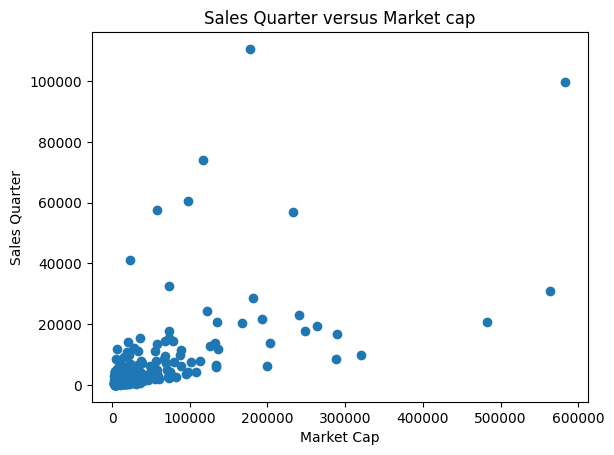

In [6]:
plt.scatter(df['market_cap'], df['sales_qtr'])
plt.title('Sales Quarter versus Market cap')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')

In [7]:
#we can see that the data is very much concentrated on the lower left corner.
#The only way to properly study the data, is to divide the data into 4 quartiles based on either of those variables
#Let us split it based on Market Cap
q = df['market_cap'].quantile([0.25, 0.5, 0.75])
df_q1 = []
df_q2 = []
df_q3 = []
df_q4 = []
for index, row in df.iterrows():
  marketcap = row['market_cap']
  if marketcap <= q[0.25]:
    df_q1.append(row)
  elif marketcap <= q[0.5]:
    df_q2.append(row)
  elif marketcap <= q[0.75]:
    df_q3.append(row)
  else:
    df_q4.append(row)
df_q1 = pd.DataFrame(df_q1)
df_q2 = pd.DataFrame(df_q2)
df_q3 = pd.DataFrame(df_q3)
df_q4 = pd.DataFrame(df_q4)


In [8]:
print('q1:', df_q1.shape, 'q2:', df_q2.shape, 'q3:', df_q3.shape, 'q4:', df_q4.shape)

q1: (115, 3) q2: (115, 3) q3: (114, 3) q4: (115, 3)


Text(0, 0.5, 'Sales Quarter')

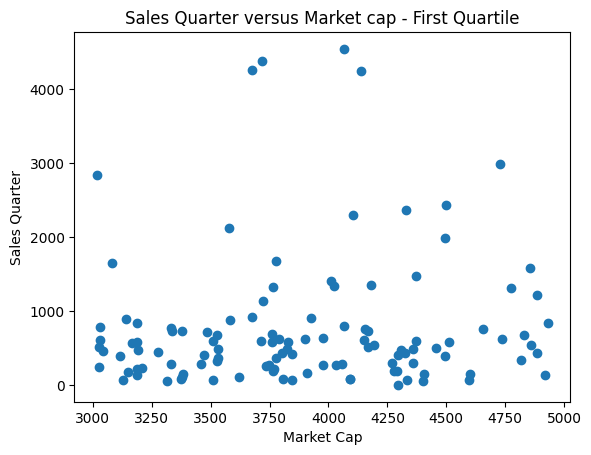

In [9]:
#Let us examine each quartile now:
plt.scatter(df_q1['market_cap'], df_q1['sales_qtr'])
plt.title('Sales Quarter versus Market cap - First Quartile')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')

Text(0, 0.5, 'Sales Quarter')

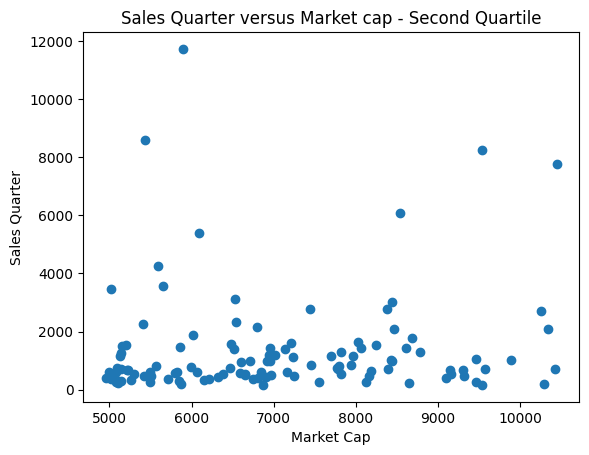

In [10]:
#we can see that most of the points are linear. Let us check if this is the case for the other quartiles as well
plt.scatter(df_q2['market_cap'], df_q2['sales_qtr'])
plt.title('Sales Quarter versus Market cap - Second Quartile')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')

Text(0, 0.5, 'Sales Quarter')

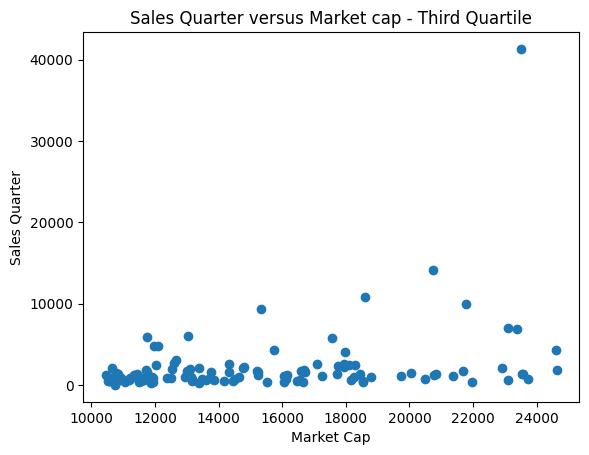

In [11]:
plt.scatter(df_q3['market_cap'], df_q3['sales_qtr'])
plt.title('Sales Quarter versus Market cap - Third Quartile')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')

Text(0, 0.5, 'Sales Quarter')

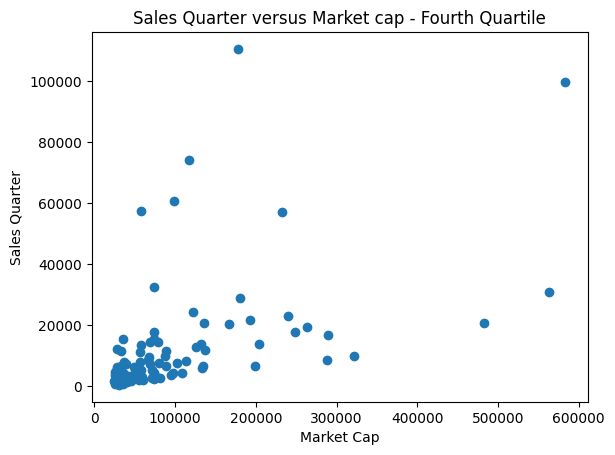

In [12]:
plt.scatter(df_q4['market_cap'], df_q4['sales_qtr'])
plt.title('Sales Quarter versus Market cap - Fourth Quartile')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')

Slope (m): 0.05557634499846243
Intercept (b): 510.3589274046102


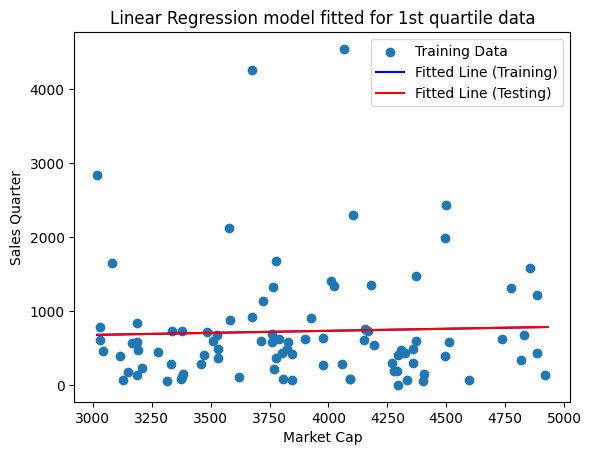

In [22]:
#we can see that 1, 2 and 3 follow a linear relationship, however 4th doesnt have a linear relationship. 
#let us fit a linear regression model for all 4 quartiles and see if we can predict the sales quarter.
#1st Quartile
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = np.reshape(df_q1['market_cap'], (-1, 1))
y = df_q1['sales_qtr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train, y_train, label='Training Data')
x_new_train = np.linspace(X_train.min(), X_train.max(), 100)
y_new_train = m * x_new_train + b
x_new_test = np.linspace(X_test.min(), X_test.max(), 100)
y_new_test = m * x_new_test + b  
plt.plot(x_new_train, y_new_train, label='Fitted Line (Training)', color='blue')
plt.plot(x_new_test, y_new_test, label='Fitted Line (Testing)', color='red')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')
plt.legend()
plt.title('Linear Regression model fitted for 1st quartile data')
print("Slope (m):", m)
print("Intercept (b):", b)
plt.show()

Slope (m): 0.03318397723254367
Intercept (b): 1086.4525239483858


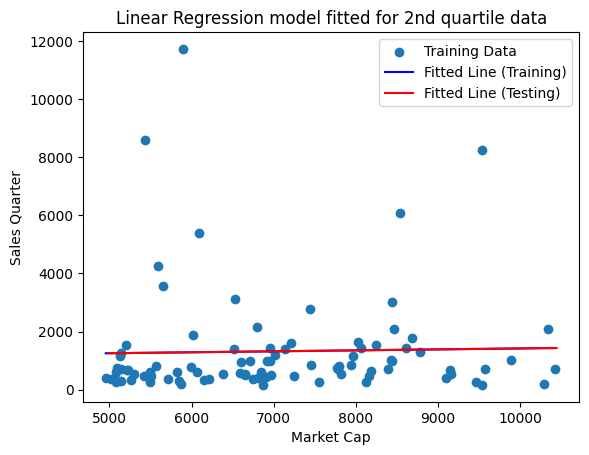

In [16]:
X = np.reshape(df_q2['market_cap'], (-1, 1))
y = df_q2['sales_qtr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train, y_train, label='Training Data')
x_new_train = np.linspace(X_train.min(), X_train.max(), 100)
y_new_train = m * x_new_train + b
x_new_test = np.linspace(X_test.min(), X_test.max(), 100)
y_new_test = m * x_new_test + b  # Prediction on testing data
plt.plot(x_new_train, y_new_train, label='Fitted Line (Training)', color='blue')
plt.plot(x_new_test, y_new_test, label='Fitted Line (Testing)', color='red')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')
plt.legend()
plt.title('Linear Regression model fitted for 2nd quartile data')
print("Slope (m):", m)
print("Intercept (b):", b)
plt.show()

Slope (m): 0.41880896519654504
Intercept (b): -4151.767575048876


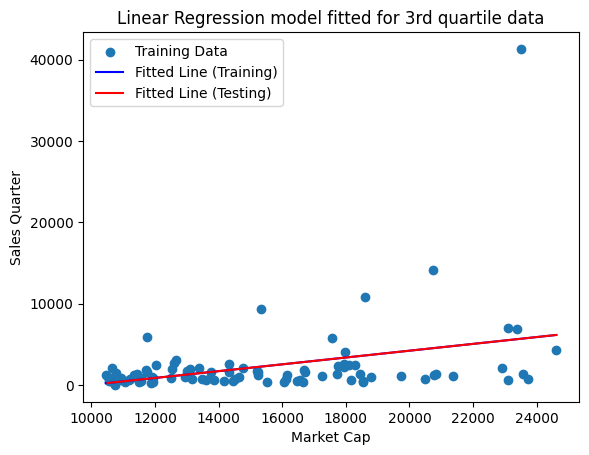

In [17]:
X = np.reshape(df_q3['market_cap'], (-1, 1))
y = df_q3['sales_qtr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train, y_train, label='Training Data')
x_new_train = np.linspace(X_train.min(), X_train.max(), 100)
y_new_train = m * x_new_train + b
x_new_test = np.linspace(X_test.min(), X_test.max(), 100)
y_new_test = m * x_new_test + b  # Prediction on testing data
plt.plot(x_new_train, y_new_train, label='Fitted Line (Training)', color='blue')
plt.plot(x_new_test, y_new_test, label='Fitted Line (Testing)', color='red')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')
plt.legend()
plt.title('Linear Regression model fitted for 3rd quartile data')
print("Slope (m):", m)
print("Intercept (b):", b)
plt.show()
#The negative slope is due to the presence of 0s in the sales_qtr column

Slope (m): 0.07529488984209604
Intercept (b): 3791.2774777857567


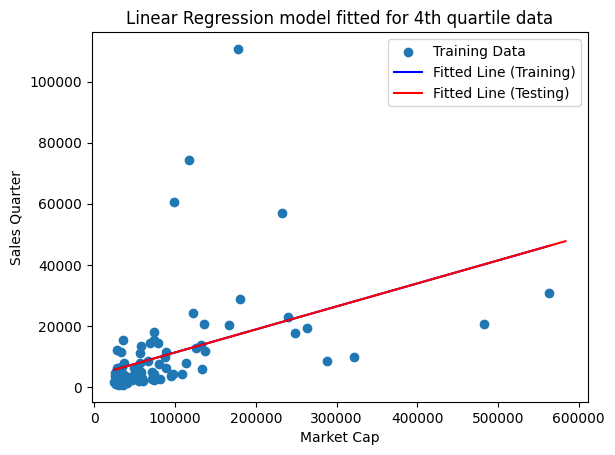

In [18]:
X = np.reshape(df_q4['market_cap'], (-1, 1))
y = df_q4['sales_qtr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train, y_train, label='Training Data')
x_new_train = np.linspace(X_train.min(), X_train.max(), 100)
y_new_train = m * x_new_train + b
x_new_test = np.linspace(X_test.min(), X_test.max(), 100)
y_new_test = m * x_new_test + b  # Prediction on testing data
plt.plot(x_new_train, y_new_train, label='Fitted Line (Training)', color='blue')
plt.plot(x_new_test, y_new_test, label='Fitted Line (Testing)', color='red')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')
plt.legend()
plt.title('Linear Regression model fitted for 4th quartile data')
print("Slope (m):", m)
print("Intercept (b):", b)
plt.show()

Slope (m): 0.08224224136479705
Intercept (b): 1326.5636222044045


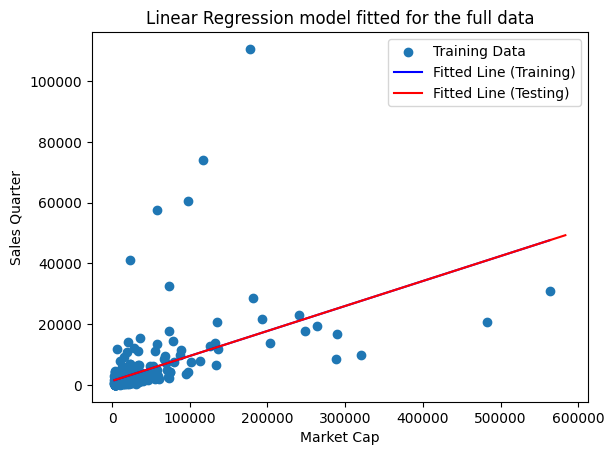

In [19]:
#It is important to split up the data, because it inherently doesnt have a linear nature. 
#This can be explored by building a linear regression model using the full df
X = np.reshape(df['market_cap'], (-1, 1))
y = df['sales_qtr']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train, y_train, label='Training Data')
x_new_train = np.linspace(X_train.min(), X_train.max(), 100)
y_new_train = m * x_new_train + b
x_new_test = np.linspace(X_test.min(), X_test.max(), 100)
y_new_test = m * x_new_test + b  # Prediction on testing data
plt.plot(x_new_train, y_new_train, label='Fitted Line (Training)', color='blue')
plt.plot(x_new_test, y_new_test, label='Fitted Line (Testing)', color='red')
plt.xlabel('Market Cap')
plt.ylabel('Sales Quarter')
plt.legend()
plt.title('Linear Regression model fitted for the full data')
print("Slope (m):", m)
print("Intercept (b):", b)
plt.show()

In [ ]:
#We would get a more accurate model if we had treated for outliers, but in financial data it is not advisable to do so.
#This concludes this project